In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


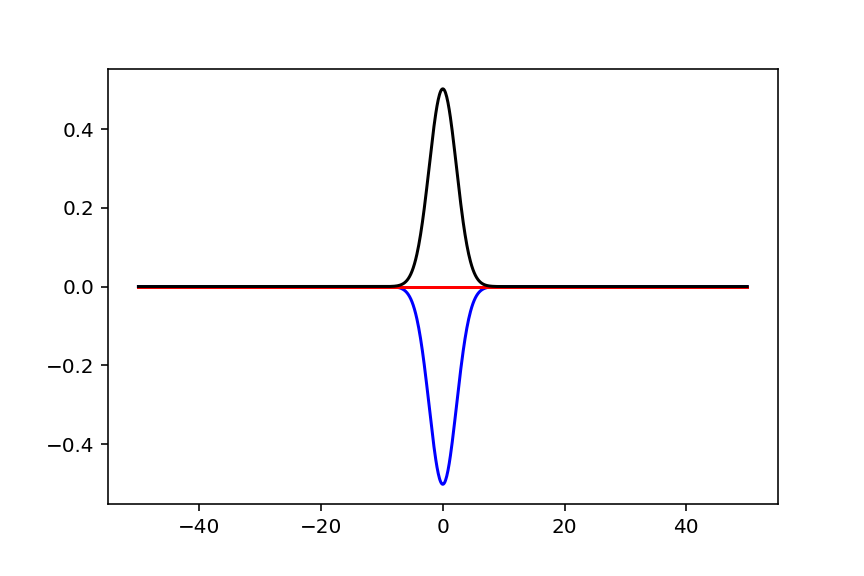

In [19]:
# Gaussian Example

a=0.1   # Gaussian parameter (Griffiths)
l=0  # wavenumber of particle

def psi(x):
    return (2*a/np.pi)**0.25*np.exp(-a*x**2)*np.exp(1j*l*x)

def tpsi(x,t):
    gamma = complex(1,2*1j*t)
    return (2*a/np.pi)**0.25/gamma * np.exp(-a*(x-l*t/a)**2/gamma**2)*np.exp(1j*l*(x-l*t/(2*a)))

xf = np.linspace(-50,50,1000)
t=1

plt.plot(xf,np.real(tpsi(xf,t)),"b-")
plt.plot(xf,np.imag(tpsi(xf,t)),"r-")
plt.plot(xf,np.absolute(tpsi(xf,t)),"k-")

<IPython.core.display.Javascript object>


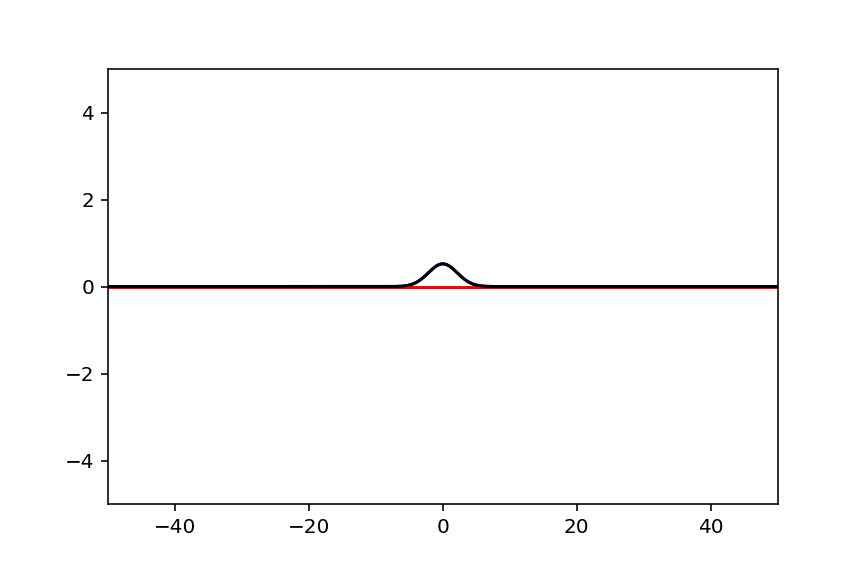

In [20]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

xf = np.linspace(-50,50,1000)
plt . xlim (-50,50)
plt . ylim (-5,5)
la , = plt. plot ([], [], "b-")
lb , = plt. plot ([], [], "r-")
lc , = plt. plot ([], [], "k-")

def animate (i):
    psi = tpsi(x,i*0.01)
    la. set_data (x,np.real(psi))
    lb. set_data (x,np.imag(psi))
    lc. set_data (x,np.absolute(psi))    
anim = FuncAnimation (plt .gcf () , animate , frames =100 , interval =20 , repeat = True )
plt.show()

# Set up formatting for the movie files
#Writer = writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Mulhearn'), bitrate=1800)
#anim.save('im.mp4', writer=writer)

